<h3><strong>지도학습 supervised learning</strong></h3>

분류: 목표 변수가 범주형인 경우

ex. 이진분류 작업(binary classification), 다중 클래스 분류(multi-class classification), 다중 레이블 분류(multi-label classification) 등

In [72]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# 0. 데이터 확인하기
train_file = 'train.csv'
test_file = 'test.csv'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
print(train.columns)
train.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
# 데이터 전처리 - 결측치 확인하고 없애기
# 데이터 중 결측치를 포함하고 있는 고유 값 확인하기
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [92]:
train.nunique(dropna = False)
## age, embarked 등에 결측치가 있음을 확인할 수 있음.

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [93]:
test.info()
train.info()
# test에는 train에 없는 survived 열이 존재함. 이를 맞춰주기 위해

test.insert(loc=1, column='Survived', value=0)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

<Axes: >

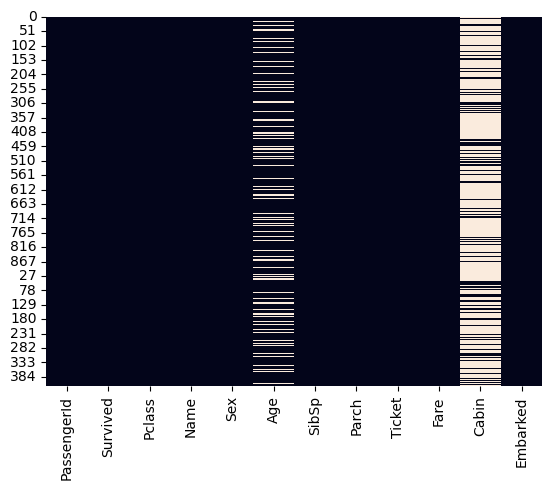

In [94]:
# test, train 데이터셋 합치고 결측치 처리하기
data = pd.concat([train, test], axis=0)
# msno.matrix(data) # sns 사용과 동일한 결과값 얻을 수 있음.
sns.heatmap(data.isnull(),cbar=False)

1) 결측치 무시하기(날리기)
- df.dropna()


2) 평균, 중위값 등 대체   -> fillna(method=)으로 na에 원하는 값 넣기 가능(원본 수정)

- df_hum_mean=df['hum'].mean()

- df['hum'].fillna(df_hum_mean).to_frame()
ffill -> 직전 값으로 대체 / bfill -> 직후 값으로 대체


3) 보간법     -> interpolate(method=)으로 누락값 사이를 평균으로 대체하여 만듦

- df['hum'].interpolate().to_frame()

- ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 
'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives',
'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']  중 하나를 method로 사용

-- method = 'linear' -> 선형 보간법으로, 1차원 상 두 점 사이의 거리로 대체

-- method = 'silinear' or 'cubic' -> 1.2.3차 항을 높이면서 보간

-- method = 'spline', order = n  -> n차원 이상의 차원으로 높여 보간

-- method = 'time' -> 시간차를 고려한 선형 보간

<Axes: >

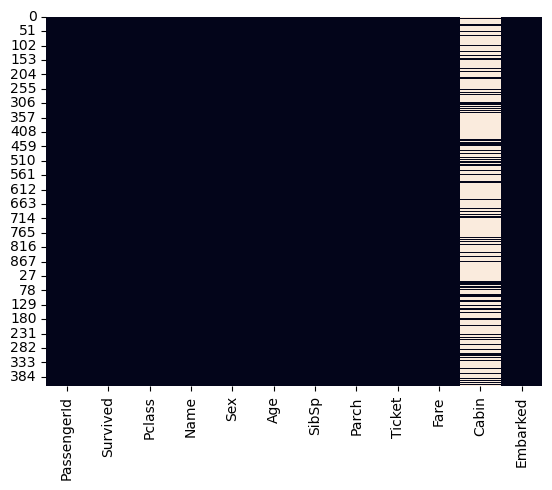

In [95]:
# age는 평균으로 결측치 처리
age_mean = data['Age'].mean()
data['Age'] = data['Age'].fillna(age_mean)
sns.heatmap(data.isnull(),cbar=False)

<Axes: >

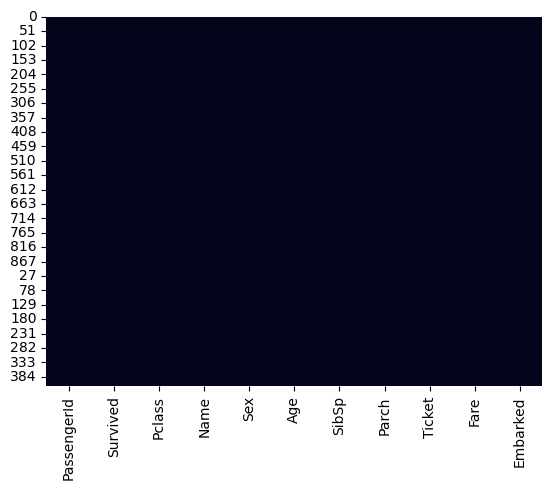

In [96]:
# cabin은 결측치가 많기에 if data의 양의 절반보다 많은 경우 다 없애기
data = data.dropna(thresh=int(len(data)*0.5), axis=1)
sns.heatmap(data.isnull(),cbar=False)

<Axes: >

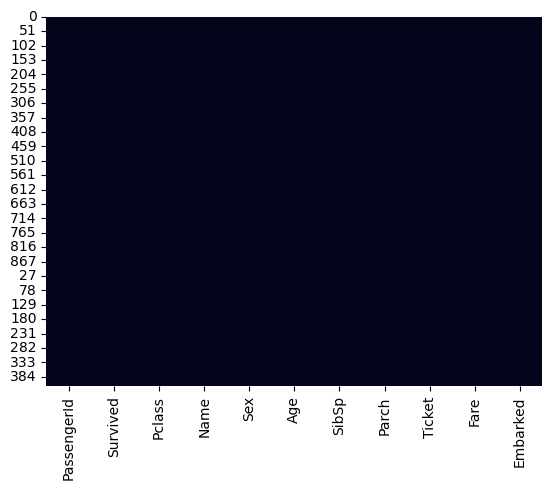

In [97]:
# fare은 중앙값으로 처리
fare_med = data['Age'].median()
data['Fare'] = data['Fare'].fillna(fare_med)
sns.heatmap(data.isnull(),cbar=False)

<Axes: xlabel='Embarked', ylabel='count'>

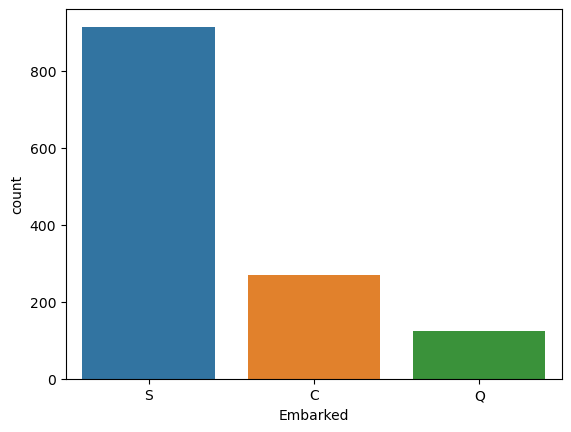

In [98]:
# embarked는 최빈값으로 처리
sns.countplot(data=data, x='Embarked')

In [99]:
data['Embarked'] = data['Embarked'].fillna('S')

In [100]:
# 2. 로지스틱 회귀를 사용해 지도학습 진행
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [101]:
# 타겟 데이터를 선정해 내가 원하는 결과값 지정
target = data['Survived']

# 불필요한 열 없애기
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Survived','Embarked'], axis=1)

# 텍스트에서 숫자로 바꾸기
data['Sex']=data['Sex'].map({'male':0,'female':1})
data

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,3,1,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...
413,3,0,29.881138,0,0,8.0500
414,1,1,39.000000,0,0,108.9000
415,3,0,38.500000,0,0,7.2500
416,3,0,29.881138,0,0,8.0500


In [102]:
# train, test 분리
train, test = data[:len(train)],data[:len(train)]
train_input, test_input, train_target, test_target = train_test_split(
    data, target, random_state=42)

In [103]:
# 로지스틱 회귀 인스턴스 생성 및 학습
lr = LogisticRegression()
# 훈련 데이터로 모델 훈련
lr.fit(train_input, train_target)
print(lr.predict(test_input))

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0]


In [105]:
# 변수 가중치 확인하기
print(data.head(0))
print(lr.coef_)

Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare]
Index: []
[[-7.54744530e-01  1.83138133e+00 -2.50894491e-02 -1.80013300e-01
  -8.17059861e-02  3.67587898e-05]]


In [107]:
# 3. 예측해보기
pred = lr.predict([[2, 0, 22.0, 0, 0, 30.5789]])

if(pred[0] == 0):
    print('AI : 사망하실 것으로 예측됩니다.\n')
else:
    print('AI : 생존하실 것으로 예측됩니다.\n')
    
# 아앗...

AI : 사망하실 것으로 예측됩니다.



c:\anaconda3project\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
